<a href="https://colab.research.google.com/github/Bibhas007/ML-Projects/blob/main/Project_Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Predicting heart disease using machine learning 
"""
we are going to take following approach
1. Problem Solving
2. Data
3. Evaluation
4. Features
5. Modeling
6. Experimentation

# 1. Problem Defination

# Given clinical parameters about a patient,can we predict whether or not  they have heart disease

# 2. Data : original data came from UCI repository and same also kept in keggle.

# 3. Evaluation : If we can 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

# 4. Features :Features are important about information
"""




"\nwe are going to take following approach\n1. Problem Solving\n2. Data\n3. Evaluation\n4. Features\n5. Modeling\n6. Experimentation\n\n# 1. Problem Defination\n\n# Given clinical parameters about a patient,can we predict whether or not  they have heart disease\n\n# 2. Data : original data came from UCI repository and same also kept in keggle.\n\n# 3. Evaluation : If we can 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.\n\n# 4. Features :Features are important about information\n"

In [2]:
# 1. preparing the tools 
#We are going to use pandas, matplotlib and numpy for data analysis and manipulation

#Import all the tools we need
#Regular EDI and plotting libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

# We want our plot to appear inside the notebook

# Models fro Scikit learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve

In [3]:
# Load Data
df = pd.read_csv("/content/heart-disease.csv")
df.shape

(303, 14)

In [4]:
## Data Exploration (exploratory data analysis or EDA)

#

1. What question you are trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add,change or remove features to get more out of your data?

#

Object `solve` not found.
Object `types` not found.
Object `it` not found.
Object `them` not found.
Object `data` not found.


In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
# let's find out how many of each class there
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

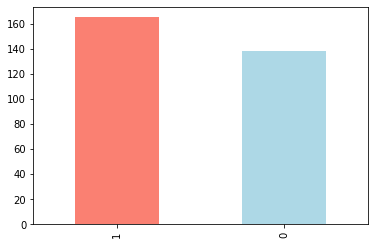

In [8]:
df["target"].value_counts().plot(kind="bar",color=["salmon","lightblue"]);

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [13]:
# Compare target column with sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


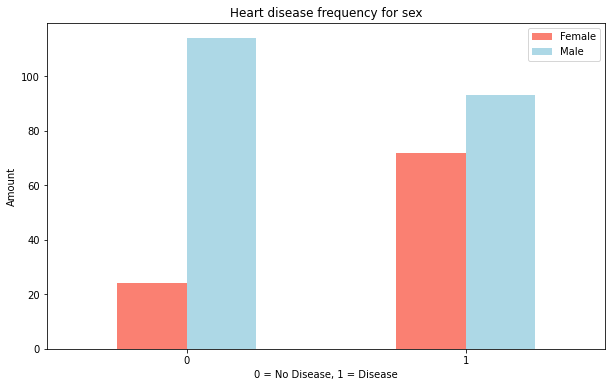

In [14]:
# Create a plot of crosstab
pd.crosstab(df.target,df.sex).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"])

plt.title("Heart disease frequency for sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

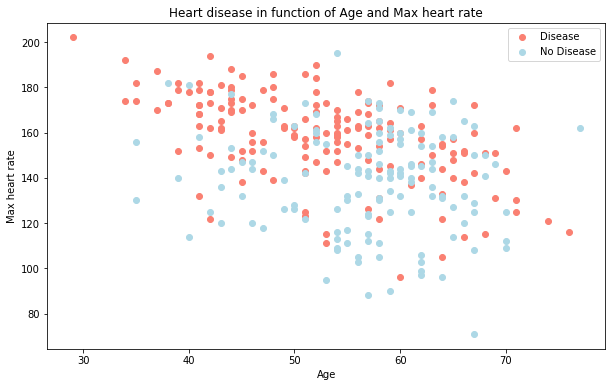

In [15]:
## Age vs Max heart rate for heart disease

# Create another figure
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],color='salmon');
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],color='lightblue');

plt.title("Heart disease in function of Age and Max heart rate")
plt.xlabel("Age")
plt.ylabel("Max heart rate")
plt.legend(["Disease","No Disease"]);

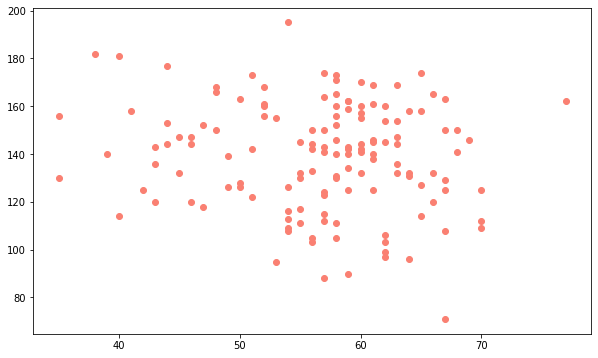

In [16]:
plt.figure(figsize=(10,6))
# Scatter with negatinve examples
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],color='salmon')

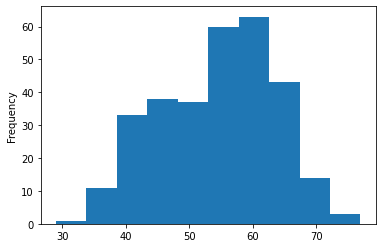

In [17]:
# Check the distribution of the age column with histogram 
df.age.plot.hist()

In [18]:
# heart disease frequency per chest pain type.

"""
0--Chest pain related heart disease related to decreae of blood supply to the heart.
1--Atypical angina : Chest pain not related to heart.
2--non-anginal pain : typically esophageal spasms (non-heart related).
3--Asymptomatic : chest pain not showing signs of disease.
"""

'\n0--Chest pain related heart disease related to decreae of blood supply to the heart.\n1--Atypical angina : Chest pain not related to heart.\n2--non-anginal pain : typically esophageal spasms (non-heart related).\n3--Asymptomatic : chest pain not showing signs of disease.\n'

In [19]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


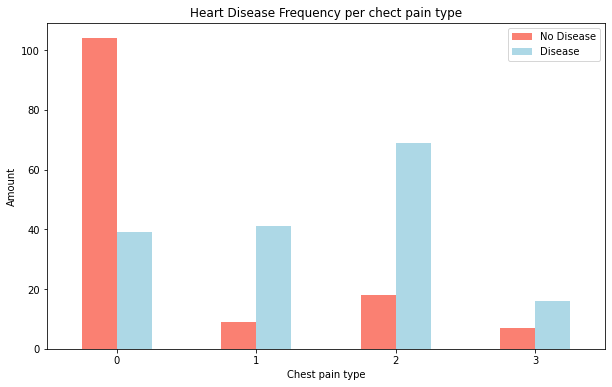

In [20]:
# Make the crosstab more visual.

pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"])

#Add some communication
plt.title("Heart Disease Frequency per chect pain type")
plt.xlabel("Chest pain type")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0);

In [21]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


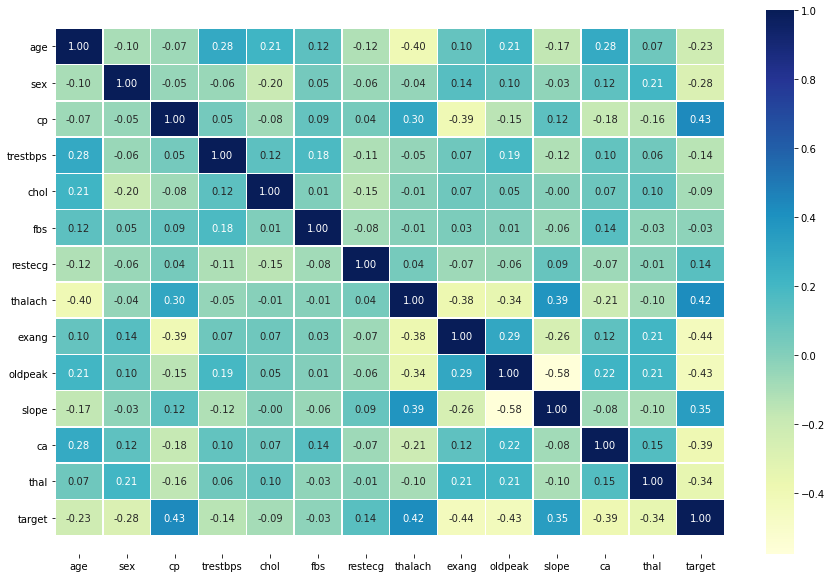

In [22]:
## Correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu")
bottom,top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

In [23]:
## Modeling
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
X=df.drop("target",axis=1)
y=df["target"]

In [25]:
#Split data into train and test
np.random.seed(42)

#Split into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [26]:
# We are going to try 3 different types of learning nodels:
"""
1.Logistic Regression
2.K-Nearest Neighbours Classifier
3.Random Forest Clssifier
"""
;

''

In [27]:
# Put model indictionary
models={"Logistic Regression": LogisticRegression(),"KNN":KNeighborsClassifier(),"Random Forest":RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models,X_train,X_test,y_train,y_test):
  """
  Fits and Evaluate given machine learning models
  models: a dict of different Scikit-Learning machine learning models
  X_train : training data (no labels)
  X_test : testing data (no labels)
  y_train : training labels
  y_test : test labels
  """

  #Set random seed
  np.random.seed(42)
  #make a dictionary to keep model scores
  model_scores={}
  #loop through models
  for name, model in models.items():
    # Fit the model to the data
    model.fit(X_train,y_train)
    #Evaluate the model and append its score to model_scores
    model_scores[name] = model.score(X_test,y_test)
  return model_scores 


In [28]:
model_scores=fit_and_score(models=models,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)
model_scores

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'KNN': 0.6885245901639344,
 'Logistic Regression': 0.8852459016393442,
 'Random Forest': 0.8360655737704918}

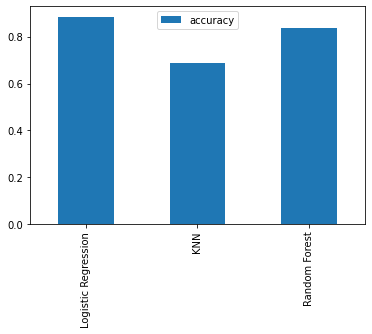

In [29]:
# Model Comparison
model_compare = pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar()

In [30]:
# Lets look at the following
"""
1. Hyperparameter tuning
2. Feature importance
3. Confusion matrix
4. Cross-Validation
5. precision
6. Recall
7. F1 Score
8. Classification Report 
9. ROC Curve
10. Area under the curve(AUC)
"""

'\n1. Hyperparameter tuning\n2. Feature importance\n3. Confusion matrix\n4. Cross-Validation\n5. precision\n6. Recall\n7. F1 Score\n8. Classification Report \n9. ROC Curve\n10. Area under the curve(AUC)\n'

In [31]:
#Hyperparameters tuning

#Lets tune KNN
train_scores=[]
test_scores=[]

#Create a list of different values for n_neighbours
neighbors=range(1,21)

#Setup KNN instance
knn=KNeighborsClassifier()

#Loop through different n_neighbours 
for i in neighbors:
  knn.set_params(n_neighbors=i)

  # Fit the algorithm
  knn.fit(X_train,y_train)

  #Update the training score list
  train_scores.append(knn.score(X_train,y_train))

  #Update the test score list
  test_scores.append(knn.score(X_test,y_test))


In [32]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [33]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


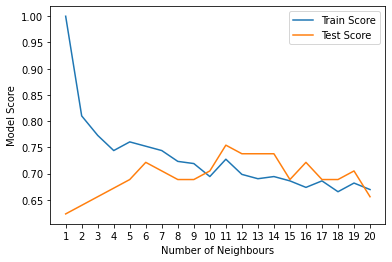

In [34]:
plt.plot(neighbors,train_scores,label="Train Score")
plt.plot(neighbors,test_scores,label="Test Score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of Neighbours")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

In [35]:
#Hyperparameter Tuning with RandomizedSearchCV
"""
We are going to tune
1. LogisticRegression()
2.RandomForestClassifier()

.....using RandomizedSearchCV
"""

'\nWe are going to tune\n1. LogisticRegression()\n2.RandomForestClassifier()\n\n.....using RandomizedSearchCV\n'

In [36]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4,4,20),"solver":["liblinear"]}

# Create a hyperparameter grid for RandomizedForestClassifier
rf_grid = {"n_estimators":np.arange(10,100,50),"max_depth": [None,3,5,10],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf": np.arange(1,20,2)}


In [37]:
# np.logspace(-4,4,20)

In [38]:
# Tune Logistic Regression
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid,cv=5,n_iter=20,verbose=True)

# Fit Random hyperparameter search model for logistic regression
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [39]:
rs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [40]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

In [41]:
# Lets tune RandomForestClassifier
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_grid,cv=5,n_iter=20,verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier 
rs_rf.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.8s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [42]:
rs_rf.best_params_

{'max_depth': 3,
 'min_samples_leaf': 17,
 'min_samples_split': 18,
 'n_estimators': 10}

In [43]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test,y_test)

0.819672131147541

In [44]:
## Hyperparameter tunig by GridSearchCV for LogisticRegression
log_reg_grid={"C": np.logspace(-4,4,30),"solver": ["liblinear"]}

## Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),param_grid=log_reg_grid,cv=5,verbose=True)

# Fit hyperparameter search model
gs_log_reg.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-04, 1.8...
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5

In [45]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [46]:
gs_log_reg.score(X_test,y_test)

0.8852459016393442

In [47]:
## Evaluating our tuned machine learning classifier, beyond accuracy

"""

* ROC Curve and AUC Curve
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-Score

******it qould be great if cross-validation was used where possible.

"""

'\n\n* ROC Curve and AUC Curve\n* Confusion matrix\n* Classification report\n* Precision\n* Recall\n* F1-Score\n\n******it qould be great if cross-validation was used where possible.\n\n'

In [48]:
# make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [49]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

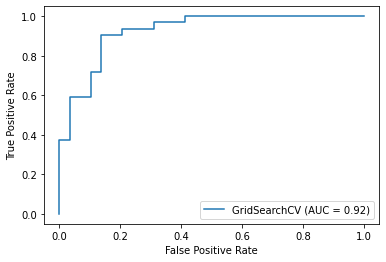

In [50]:
# plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg,X_test,y_test)

In [51]:
# Confusion metrics
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


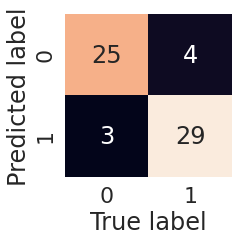

In [52]:
sns.set(font_scale=2)
def plot_conf_mat(y_test,y_preds):
  """
  Plots a nice looking confusion matrix using Seaborn's heatmap()

  """
  fig, ax = plt.subplots(figsize=(3,3))
  ax = sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar=False)
  plt.xlabel("True label")
  plt.ylabel("Predicted label")

plot_conf_mat(y_test,y_preds)

In [53]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [54]:
## Calculate evaluation metrics using cross-validation
## Check best hyperparameters

gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [55]:
# Create a new classifier with best parameters
clf=LogisticRegression(C=0.20433597178569418,solver= "liblinear")

#Cross validated Accuracy
cv_acc=cross_val_score(clf,X,y,cv=5,scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [56]:
np.mean(cv_acc)

0.8446994535519124

In [57]:
# Cross validate precision
cv_precision = cross_val_score(clf,X,y,scoring="precision")

cv_precision=np.mean(cv_precision)
cv_precision

0.8207936507936507

In [58]:
# Cross validate recall
cv_recall = cross_val_score(clf,X,y,scoring="recall")

cv_recall=np.mean(cv_recall)
cv_recall

0.9212121212121213

In [59]:
# Cross validate f1
cv_f1 = cross_val_score(clf,X,y,scoring="f1")

cv_f1=np.mean(cv_f1)
cv_f1

0.8673007976269721

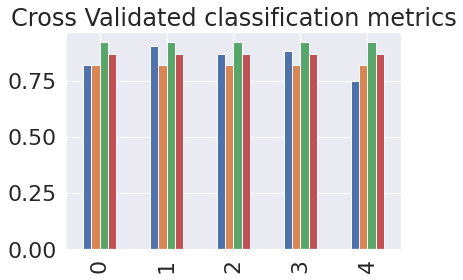

In [60]:
# Visualize cross_validated metrics
cv_metrics = pd.DataFrame({"Accuracy":cv_acc,
                           "Precision": cv_precision,
                           "Recall":cv_recall,
                           "F1":cv_f1})

cv_metrics.plot.bar(title="Cross Validated classification metrics",legend=False)



In [61]:
### Feature importance

gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [62]:
clf=LogisticRegression(C=0.20433597178569418,solver= "liblinear")
clf.fit(X_train,y_train)

LogisticRegression(C=0.20433597178569418, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
#Check Coeff
clf.coef_

array([[ 0.00320769, -0.86062049,  0.66001432, -0.01155971, -0.00166496,
         0.04017236,  0.31603405,  0.02458922, -0.60470171, -0.56795456,
         0.45085392, -0.63733328, -0.67555094]])

In [64]:
# match coef's of feature to columns
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0032076883508599633,
 'ca': -0.6373332766360461,
 'chol': -0.0016649614843449207,
 'cp': 0.660014324982524,
 'exang': -0.604701713592625,
 'fbs': 0.040172360271308105,
 'oldpeak': -0.5679545646616215,
 'restecg': 0.31603405294617176,
 'sex': -0.8606204883695241,
 'slope': 0.4508539209693025,
 'thal': -0.6755509369619848,
 'thalach': 0.02458922341328129,
 'trestbps': -0.01155970600550047}

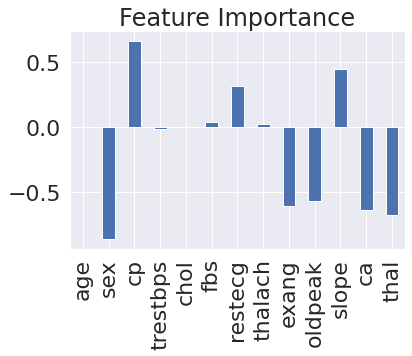

In [65]:
# Visualize Feature importance
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance",legend=False)

In [66]:
# Further experimentation
"""
1. Could you collect more data
2. Could you try better model like CatBoost,XGBoost
3. Could you improve the current model
4. if your model is good enough (you have hit your evaluation metric),how would you export it and share it with others?
"""

'\n1. Could you collect more data\n2. Could you try better model like CatBoost,XGBoost\n3. Could you improve the current model\n4. if your model is good enough (you have hit your evaluation metric),how would you export it and share it with others?\n'